# Analysis of Nobel prize winners

Welcome to the programming example page. This page shows an example analysis of Nobel prize winners. The coding commands and techniques that are demonstrated in this analysis are similar to those that are needed for your particle physics analysis.


**IMPORTANT:** For every code box with code already in it, like the one below you must click in and press shift+enter to run the code. This is how you also run your own code. 

If the `In [x]:` to the left of a codebox changes to `In [*]:` that means the code in that box is currently running

If you ever want more space to display output of code you can press the `+` button in the toolbar to the right of the save button to create another input box.

For the sliders in the example histograms to work you will have to run all the codeboxes in this notebook. You can either do this as you read and try changing the code to see what happens, or select cell in the toolbar at the top and select run all.

First we load in the libraries we require and read in the file that contains the data.

In [2]:
from __future__ import print_function
from __future__ import division

%pylab inline
filename = 'Data/setup_example.py'
#execfile('Data/setup_example.py')
exec(open(filename).read())

Populating the interactive namespace from numpy and matplotlib


Lets now view the first few lines of the data table. The rows of the data table are each of the Nobel prizes awarded and the columns are the information about who won the prize.   

We have put the data into a pandas DataFrame we can now use all the functions associated with DataFrames. A useful function is `.head()`, this prints out the first few lines of the data table.

In [3]:
data.head(5) # Displaying some of the data so you can see what form it takes in the DataFrame

,Year,Category,Name,Birthdate,Birth Place,County,Residence,Role/Affiliate,Field/Language,Prize Name,Motivation,BirthYear
0,1901,chemistry,Jacobus Henricus van 't Hoff,30 August 1852,Rotterdam,the Netherlands,No Data,"Berlin University, Berlin, Germany","Physical chemistry, chemical kinetics",The Nobel Prize in Chemistry,The Nobel Prize in Chemistry 1901 was awarded ...,1852
1,1901,literature,Sully Prudhomme,16 March 1839,Paris,France,France,No Data,French,The Nobel Prize in Literature,The Nobel Prize in Literature 1901 was awarded...,1839
2,1901,medicine,Emil Adolf von Behring,15 March 1854,Hansdorf (now Jankowa ?aga?ska),Prussia (now Poland),No Data,"Marburg University, Marburg, Germany",No Data,The Nobel Prize in Physiology or Medicine,The Nobel Prize in Physiology or Medicine 1901...,1854
3,1901,peace,Frédéric Passy,20 May 1822,Paris,France,France,Founder and President of first French peace s...,"Humanitarian work, peace movement",The Nobel Peace Prize,The Nobel Peace Prize 1901 was awarded jointly...,1822
4,1901,peace,Jean Henry Dunant,8 May 1828,Geneva,Switzerland,Switzerland,Originator Geneva Convention (Convention de G...,"Humanitarian work, peace movement",The Nobel Peace Prize,The Nobel Peace Prize 1901 was awarded jointly...,1828


# Plotting a histogram

Lets learn how to plot histograms. We will plot the number of prizes awarded per year. Nobel prizes can be awarded for up to three people per category. As each winner is recorded as an individual entry the histogram will tell us if there has been a trend of increasing or decreasing multiple prize winners in one year.

However before we plot the histogram we should find information out about the data so that we can check the range of the data we want to plot.

In [4]:
# print the earliest year in the data
print(data.Year.min())

1901


In [5]:
# print the latest year in the data
print(data.Year.max())

2010


The data set also contains entries for economics. Economics was not one of the original Nobel prizes and has only been given out since 1969. If we want to do a proper comparison we will need to filter this data out. We can do this with a pandas query.

We can then check there are no economics prizes left by finding the `len`gth of the data after applying a query to only select economics prizes. This will be used in the main analysis to count the number of $B^+$ and $B^-$ mesons.

In [6]:
# filter out the Economics prizes from the data
data_without_economics = data.query("Category != 'economics'")
print('Number of economics prizes in "data_without_economics":')
print(len(data_without_economics.query("Category == 'economics'")))

Number of economics prizes in "data_without_economics":
0


We can now plot the histogram over a sensible range using the `hist` function from `matplotlib`. You will use this throughout the main analysis.

Text(0, 0.5, 'Number of Winners')

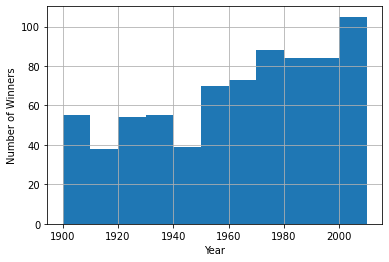

In [7]:
# plot the histogram of number of winners against year
H_WinnersPerYear = data_without_economics.Year.hist(bins=11, range=[1900, 2010]) 
xlabel('Year')
ylabel('Number of Winners')

From the histogram we can see that there has been a recent trend of more multiple prize winners in the same year. However there is a drop in the range 1940 - 1950, this was due to prizes being awarded intermittently during World War II. To isolate this gap we can change the bin size (by changing the number of bins variable) to contain this range. Try changing the slider below (you will have to click in code box and press shift+enter to activate it) and see how the number of bins affects the look of the histogram.

In [8]:
def plot_hist(bins): 
    changingBins = data_without_economics.Year.hist(bins=bins, range=[1900,2010])
    xlabel('Year')
    ylabel('Number of People Given Prizes')
    BinSize = round(60/bins, 2)
    print(BinSize)

interact(plot_hist, bins=[2, 50, 1])

interactive(children=(Dropdown(description='bins', options=(2, 50, 1), value=2), Output()), _dom_classes=('wid…

<function __main__.plot_hist(bins)>

As you can see by varying the slider - changing the bin size really does change how the data looks! There is discussion on what is the appropiate bin size to use in the main notebook.

## Preselections

We now want to select our data. This is the same process as with filtering out economics prizes before but we'll go into more detail. This time lets filter out everything except Physics. We could do so by building a new dataset from the old one with loops and if statements, but the inbuilt pandas function `.query()` provides a quicker way. By passing a conditional statement, formatted into a string, we can create a new dataframe which is filled with only data that made the conditional statement true. A few examples are given below but only filtering out all but physics is used.

In [9]:
modernPhysics = "(Category == 'physics' && Year > 2005)" # Integer values don't go inside quotes
physicsOnly = "(Category == 'physics')"
# apply the physicsOnly query
physicsOnlyDataFrame = data.query(physicsOnly)

Lets check the new DataFrames to see if this has worked!

In [10]:
physicsOnlyDataFrame.head(5)

,Year,Category,Name,Birthdate,Birth Place,County,Residence,Role/Affiliate,Field/Language,Prize Name,Motivation,BirthYear
5,1901,physics,Wilhelm Conrad Röntgen,27 March 1845,Lennep (now Remscheid),Prussia (now Germany),No Data,"Munich University, Munich, Germany","X-rays, atomic physics",The Nobel Prize in Physics,The Nobel Prize in Physics 1901 was awarded to...,1845
11,1902,physics,Hendrik Antoon Lorentz,18 July 1853,Arnhem,the Netherlands,No Data,"Leiden University, Leiden, the Netherlands","Atomic physics, quantum physics",The Nobel Prize in Physics,The Nobel Prize in Physics 1902 was awarded jo...,1853
12,1902,physics,Pieter Zeeman,25 May 1865,Zonnemaire,the Netherlands,No Data,"Amsterdam University, Amsterdam, the Netherlands","Atomic physics, quantum physics",The Nobel Prize in Physics,The Nobel Prize in Physics 1902 was awarded jo...,1865
17,1903,physics,Antoine Henri Becquerel,15 December 1852,Paris,France,No Data,"école Polytechnique, Paris, France",Nuclear physics,The Nobel Prize in Physics,"The Nobel Prize in Physics 1903 was divided, o...",1852
18,1903,physics,"Marie Curie, née Sklodowska",7 November 1867,Warsaw,Russian Empire (now Poland),No Data,NaN,Nuclear physics,The Nobel Prize in Physics,"The Nobel Prize in Physics 1903 was divided, o...",1867


Brilliant! You will find this technique useful to select kaons in the main analysis. Lets now plot the number of winners per year just for physics.

Text(0, 0.5, 'Number of Winners in Physics')

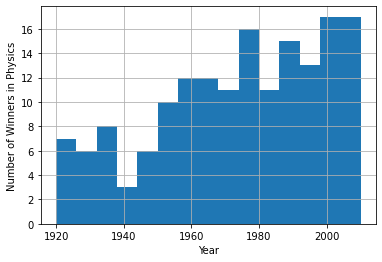

In [11]:
H_PhysicsWinnersPerYear = physicsOnlyDataFrame.Year.hist(bins=15, range=[1920,2010])
xlabel('Year') #Plot an x label
ylabel('Number of Winners in Physics') #Plot a y label

We have now successfully plotted the histogram of just the physics prizes after applying our pre-selection.

# Calculations, Scatter Plots and 2D Histogram
### Adding New Data to a Data Frame

You will find this section useful for when it comes to creating a Dalitz plot in the particle physics analysis.

We want to see what ages people have been awarded Nobel prizes and measure the spread in the ages.

Then we'll consider if over time people have been getting awarded Nobel prizes earlier or later in their life. 

First we'll need to calculate the age or the winners at the time the prize was awarded based on the `Year` and `Birthdate` columns. We create an `AgeAwarded` variable and add this to the data.

In [12]:
# Create new variable in the dataframe
physicsOnlyDataFrame['AgeAwarded'] = physicsOnlyDataFrame.Year - physicsOnlyDataFrame.BirthYear
physicsOnlyDataFrame.head(5)

,Year,Category,Name,Birthdate,Birth Place,County,Residence,Role/Affiliate,Field/Language,Prize Name,Motivation,BirthYear,AgeAwarded
5,1901,physics,Wilhelm Conrad Röntgen,27 March 1845,Lennep (now Remscheid),Prussia (now Germany),No Data,"Munich University, Munich, Germany","X-rays, atomic physics",The Nobel Prize in Physics,The Nobel Prize in Physics 1901 was awarded to...,1845,56
11,1902,physics,Hendrik Antoon Lorentz,18 July 1853,Arnhem,the Netherlands,No Data,"Leiden University, Leiden, the Netherlands","Atomic physics, quantum physics",The Nobel Prize in Physics,The Nobel Prize in Physics 1902 was awarded jo...,1853,49
12,1902,physics,Pieter Zeeman,25 May 1865,Zonnemaire,the Netherlands,No Data,"Amsterdam University, Amsterdam, the Netherlands","Atomic physics, quantum physics",The Nobel Prize in Physics,The Nobel Prize in Physics 1902 was awarded jo...,1865,37
17,1903,physics,Antoine Henri Becquerel,15 December 1852,Paris,France,No Data,"école Polytechnique, Paris, France",Nuclear physics,The Nobel Prize in Physics,"The Nobel Prize in Physics 1903 was divided, o...",1852,51
18,1903,physics,"Marie Curie, née Sklodowska",7 November 1867,Warsaw,Russian Empire (now Poland),No Data,NaN,Nuclear physics,The Nobel Prize in Physics,"The Nobel Prize in Physics 1903 was divided, o...",1867,36


Lets make a plot of the age of the winners at the time they were awarded the prize

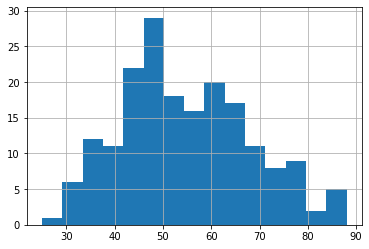

In [13]:
# plot a histogram of the laureates ages
H_AgeAwarded = physicsOnlyDataFrame.AgeAwarded.hist(bins=15)

### Making Calculations

Lets calculate a measure of the spread in ages of the laureates. We will calculate the standard deviation of the distribution.

In [14]:
# count number of entries
NumEntries = len(physicsOnlyDataFrame)
# calculate square of ages
physicsOnlyDataFrame['AgeAwardedSquared'] = physicsOnlyDataFrame.AgeAwarded**2
# calculate sum of square of ages, and sum of ages
AgeSqSum = physicsOnlyDataFrame['AgeAwardedSquared'].sum()
AgeSum = physicsOnlyDataFrame['AgeAwarded'].sum()
# calculate std and print it
std = sqrt((AgeSqSum-(AgeSum**2/NumEntries)) / NumEntries)
print(std)

13.314524371459262


There is actually a function that would calculate the rms for you, but we wanted to teach you how to manipulate data to make calculations!

In [15]:
# calculate standard deviation (rms) of distribution
print(physicsOnlyDataFrame['AgeAwarded'].std())

13.350268125361112


### Scatter Plot

Now lets plot a scatter plot of Age vs Date awarded

Text(0, 0.5, 'Age Awarded')

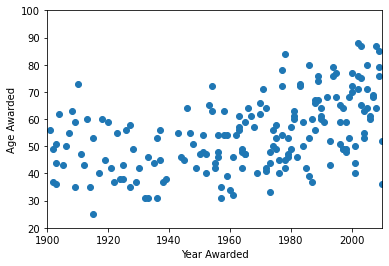

In [16]:
scatter(physicsOnlyDataFrame['Year'], physicsOnlyDataFrame['AgeAwarded'])
plt.xlim(1900, 2010) # change the x axis range
plt.ylim(20, 100)  # change the y axis range
xlabel('Year Awarded')
ylabel('Age Awarded')

### 2D Histogram

We can also plot a 2D histogram and bin the results. The number of entries in the data set is relatively low so we will need to use reasonably large bins to have acceptable statistics in each bin. We have given you the ability to change the number of bins so you can see how the plot changes. Note that the number of total bins is the value of the slider squared. This is because the value of bins given in the hist2d function is the number of bins on one axis.

Text(0, 0.5, 'Age Awarded')

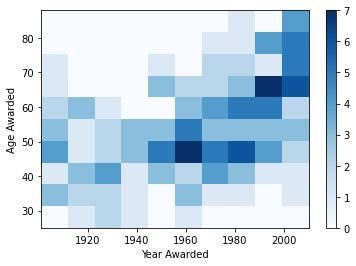

In [17]:
hist2d(physicsOnlyDataFrame.Year, physicsOnlyDataFrame.AgeAwarded, bins=10)
colorbar() # Add a colour legend
xlabel('Year Awarded')
ylabel('Age Awarded')

Alternatively you can use `interact` to add a slider to vary the number of bins

In [20]:
def plot_histogram(bins):
    hist2d(physicsOnlyDataFrame['Year'].values,physicsOnlyDataFrame['AgeAwarded'].values, bins=bins)
    colorbar() #Set a colour legend
    xlabel('Year Awarded')
    ylabel('Age Awarded')
    
interact(plot_histogram, bins=[1, 20, 10])  # Creates the slider

interactive(children=(Dropdown(description='bins', options=(1, 20, 10), value=1), Output()), _dom_classes=('wi…

<function __main__.plot_histogram(bins)>

Playing with the slider will show you the effect of changing bthe in size in a 2D histogram. The darker bins in the top right corner show that there does appear to be a trend of Nobel prizes being won at an older age in more recent years.

### Manipulating 2D histograms

**This section is advanced and only required for the final section of the main analysis.**

As the main analysis requires the calculation of an asymmetry, we now provide a contrived example of how to do this using the nobel prize dataset, we recommed only reading this section after reaching the "Searching for local matter anti-matter differences" section of the main analysis.

First calculate the number of entries in each bin of the 2D histogram and store these values in `physics_counts` as a 2D array.

`xedges` and `yedges` are 1D arrays containing the values of the bin edges along each axis.

Text(0, 0.5, 'Age Awarded')

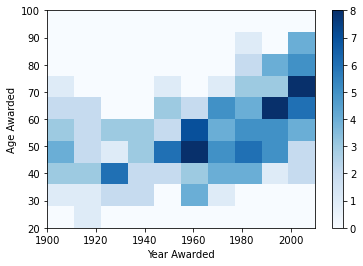

In [19]:
physics_counts, xedges, yedges, Image = hist2d(
    physicsOnlyDataFrame.Year, physicsOnlyDataFrame.AgeAwarded,
    bins=10, range=[(1900, 2010), (20, 100)]
)
colorbar() # Add a colour legend
xlabel('Year Awarded')
ylabel('Age Awarded')

Repeat the procedure used for physics to get the 2D histgram of age against year awarded for chemistry nobel prizes.

In [19]:
# Make the "chemistryOnlyDataFrame" dataset
chemistryOnlyDataFrame = data.query("(Category == 'chemistry')")
chemistryOnlyDataFrame['AgeAwarded'] = chemistryOnlyDataFrame.Year - chemistryOnlyDataFrame.BirthYear

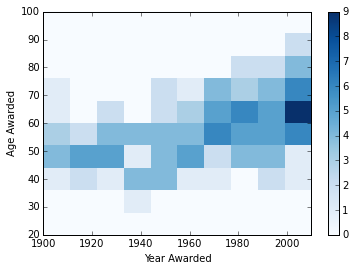

In [20]:
# Plot the histogram
chemistry_counts, xedges, yedges, Image = hist2d(
    chemistryOnlyDataFrame.Year, chemistryOnlyDataFrame.AgeAwarded,
    bins=10, range=[(1900, 2010), (20, 100)]
)
colorbar() # Add a colour legend
xlabel('Year Awarded')
ylabel('Age Awarded')

Subtract the `chemistry_counts` from the `physics_counts` and normalise by their sum. This is known as an asymmetry.

In [21]:
counts = (physics_counts - chemistry_counts) / (physics_counts + chemistry_counts)

Where there are no nobel prize winners for either subject `counts` will contain an error value (`nan`) as the number was divided by zero. Here we replace these error values with `0`.

In [22]:
counts[np.isnan(counts)] = 0

Finally plot the asymmetry using the `pcolor` function. As positive and negative values each have a different meaning we use the `seismic` colormap, see [here](http://matplotlib.org/examples/color/colormaps_reference.html) for a full list of all available colormaps.

<matplotlib.colorbar.Colorbar instance at 0x7f02d3ccda28>

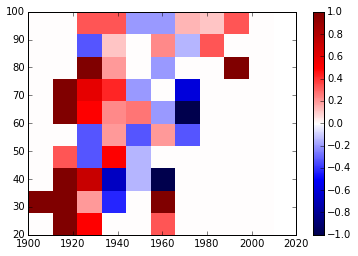

In [23]:
pcolor(xedges, yedges, counts, cmap='seismic')
colorbar()